# Background

An essential tool in astronomy is spectroscopy, or the measurement of spectra and spectral lines.
Through examination of spectra, astronomers can determine a variety of characteristics of distant
objects, such as chemical composition, radial velocity, or temperature. With stars in particular,
surface temperature and spectra are so closely related that our knowledge of a star’s surface
temperature is directly deduced from its spectral type.

Stellar spectral types are dependent on two things: the overall shape of the spectrum, and the
spectral absorption lines superimposed on it, both of which are in part determined by surface
temperature. Different absorption lines are caused by particular atoms and molecules, which are
excited by the star's heat to cause different amounts of absorption. In some cases, a star's surface
temperature even dictates whether or not specific ions and molecules can exist in the star's
atmosphere. For example, titanium oxide (TiO) will only form at lower temperatures, but extremely
high temperatures are necessary for the production of doubly ionized helium (He II.) In this lab,
however, we will focus on the other component of spectroscopy: the overall shape of a spectrum.

Stars are opaque, non-reflective objects, so their spectra can be approximated by a blackbody
spectrum, which is solely dependent on an object’s surface temperature and defined by Planck’s law:

$$
I(\lambda,T) = {  {2 h c^2} \over {\lambda^5}}  {  1 \over {  e^{  {hc}\over{\lambda k_B T}       }-1  } }
$$
or does this look better
$$
I(\lambda,T) = {  {2 h c^2} \over {\lambda^5}}  {  1 \over {  exp(  {{hc}\over{\lambda k_B T}}  ) -1  } }
$$

where I is the intensity (W sr$^{-1}$ m$^{-3}$ ), which is the energy emitted per second (W) at a certain
wavelength (m$^{-1}$ ) from a given amount of surface area (m$^{-2}$ ) as received by an outside object that
covers a given solid angle (sr$^{ -1}$ ). (Note: solid angle is the two-dimensional angle that an
object subtends at a point, giving the size an object appears to be.) The three physical constants are:
the speed of light in a vacuum $c$ , Planck’s constant $h$ , and the Boltzmann constant $k_B$ .
Because stars have atmospheres, Planck’s law is only an approximation of their spectra. Particles
in stars’ atmospheres create absorption lines that differentiate real stellar spectra from a pure
blackbody curve. This deviation is visible in the stellar spectra you will be using in Part 2.

### Lab 2 comments about residuals/sum of squares?

skipping this?

## About the data

This lab has two parts: in the first, you will generate your own “data” with Planck’s law. In the
second part, you will need to access files from a folder in **../data/spectra** . The folder contains the spectra of 5 unknown stars, and 13 spectra of stars with
defined spectral types. Each spectrum file is an ascii file, and contains an array with two columns: the first contains
wavelengths ranging from 3900 Å to 4500 Å (1 Å = 0.1 nm) and the second contains normalized
intensity.

To use the data, you will need to read the data into PYTHON (hint: numpy has a function loadtxt, astropy.io has ascii; watch out if you need to transpose the data)

## Part 1: Plotting Planck’s Law

In this part of the lab, you will plot the spectra of an M0 star, the Sun, and an A0 star.
1. Write a function to calculate the intensity given by Planck’s law for a given surface
temperature. The function should have two inputs: an array of wavelengths and a single
temperature. The output will be an array of intensities. Keep everything in SI units.
2. In a script, create an array of wavelengths to use in this function. The wavelengths should
range from 10 -10 m to 1.5x10 -6 m. Include as many points as needed for a smooth plot.
3. Using this array and your function, plot the spectrum of an A0 star. Before moving on, make
sure the function and script work . Does the plot look like what you’d expect?
4. Plot the spectra of the Sun and an M0 star on the same figure. Format the plot so that each
star is represented with a different color and line style. Include axis labels, a title, and a
legend.
5. Now that you’ve looked at purely theoretical spectra, let’s see how it compares to a real
spectrum. Read in and plot the standard spectrum for a B0 star in a new figure.
6. Generate a spectrum for a star of the same temperature from your Planck function using the
range of wavelengths given from the standard spectra data. After normalizing this array (to
normalize is to divide each point by the maximum point), plot it over the real spectrum. Add
the appropriate formatting. What differences and similarities do you see in the two spectra?

## Part 2: Spectral Identification

Now we will use a set of standard models to classify five stars with unknown spectral types.
1. In a new script, read in the data for Unknown 1 and plot the spectrum.
2. To roughly identify the star, determine which two standards it most closely resembles. To do
this, read in any two consecutive standard spectra, and plot the standards along with the
unknown in a single figure. Format the figure as in the previous section (try adapting the
script from the previous section instead of doing it all over again).
33. Using your script, change the standards until you find the two consecutive standards that
match the unknown spectrum best. What characteristics do you look for in a match?
4. In the same script, calculate the residual of the unknown with each standard. Plot both of the
residuals as a function of wavelength in a single figure with all the relevant formatting.
5. Now calculate the sum of squares of the residuals of the two standards, keeping two decimal
places. Unlike the calculation of the residuals, which resulted in an array, the sum of squares
should be a single number. Compare the two sum of squares to determine which standard is
a better model of the data. How is the sum of squares used for this comparison?
6. You should now have a single script that does this whole process; use it to identify the
remaining four unknowns. In your lab report, include all of the figures and data showing the
process of classification for the first unknown star, but only your final classification for the
other four unknowns.

In [1]:
# modules to import
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

#    physical constants
h  = 6.626e-34              # Planck constant (J s)
k  = 1.381e-23              # Boltzmann constant (J/K)
c  = 299792458.0            # speed of light (m/s)
pi = np.pi                  # 3.1415...

In [2]:
temperature_range = np.arange(3000, 9000, 1000)     # 3,000 K to 8,000 K
wavelength_range  = np.logspace(-7.0, -3.0, 1000)   # 100 nm to 1 mm


In [3]:
def planck(wavelength, temperature):
    return 2.0 * pi * h * c**2 / (wavelength**5 * (np.exp(h * c / (wavelength * k * temperature)) - 1.0))

def plancks(w,T):
    """ shorter notation version of the Planck curve"""
    return 2*pi*h*c**2 / (w**5*(np.exp(h*c/(w*k*T)) - 1))


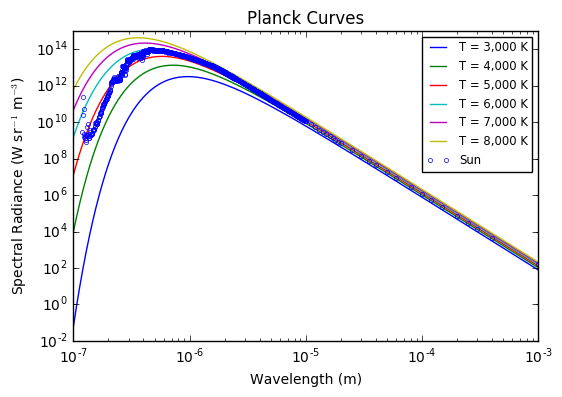

In [4]:
for temperature in temperature_range:
    plt.loglog(wavelength_range, planck(wavelength_range, temperature), label='T = {:,} K'.format(temperature))
   
#sun_data = np.loadtxt('../data/ASTM_E-490.dat')
sun_wave, sun_temp = np.loadtxt('../data/ASTM_E-490.dat',unpack=True)
#plt.loglog(sun_data[:, 0] * 1.0e-6, sun_data[:, 1] * 1.0e6 * 4.624e4, 'b.', fillstyle='none', label='Sun')
plt.loglog(sun_wave * 1.0e-6, sun_temp * 1.0e6 * 4.624e4, 'b.', fillstyle='none', label='Sun')
plt.xlabel('Wavelength (m)')
plt.ylabel('Spectral Radiance (W sr$^{-1}$ m$^{-3}$)')
plt.legend(loc='upper right',fontsize='small')
plt.title('Planck Curves')
plt.show()